In [1]:
pwd


'C:\\Users\\VIMAL\\Desktop'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel('C:\\Users\\VIMAL\\Desktop\\sampledata.xlsx')
df.head(2)

,CIFNO,SCV_Party_ID,Age_Band,Gender,Occupation_Group,Gross_Annual_Income,Ethnic,Marital_status,Seg_Locality,No_of_Prod_Held_BW,...,casa_outflow_123m,outflow avg_3m,casa_outflow_456m,outflow avg_6m,outflow_behav_change,casa_inflow_123m,inflow avg_3m,casa_inflow_456m,inflow avg_6m,inflow_behav_change
0,61581293,33459345,b.21-25,02.Female,"TECHNICIANS, SEMI-SKILLED AND ASSOCIATE PROFES...",30000.0,03.Indian,02.Single,SELANGOR,5.0,...,8491.85,2830.616667,10622.48,3540.826667,1.250903,8485.0,2828.333333,10145.0,3381.666667,1.195639
1,61957339,42671553,c.26-30,01.Male,SALES WORKERS RELATED,63720.0,03.Indian,02.Single,JOHOR,5.0,...,0.00,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000


In [3]:
df.shape

(4999, 22)

In [4]:
df.columns

Index(['CIFNO', 'SCV_Party_ID', 'Age_Band', 'Gender', 'Occupation_Group',
       'Gross_Annual_Income', 'Ethnic', 'Marital_status', 'Seg_Locality',
       'No_of_Prod_Held_BW', 'f_OtherProd', 'target', 'casa_outflow_123m',
       'outflow avg_3m', 'casa_outflow_456m', 'outflow avg_6m',
       'outflow_behav_change', 'casa_inflow_123m', 'inflow avg_3m',
       'casa_inflow_456m', 'inflow avg_6m', 'inflow_behav_change'],
      dtype='object')

In [5]:
df.dtypes

CIFNO                     int64
SCV_Party_ID              int64
Age_Band                 object
Gender                   object
Occupation_Group         object
Gross_Annual_Income     float64
Ethnic                   object
Marital_status           object
Seg_Locality             object
No_of_Prod_Held_BW      float64
f_OtherProd               int64
target                  float64
casa_outflow_123m       float64
outflow avg_3m          float64
casa_outflow_456m       float64
outflow avg_6m          float64
outflow_behav_change    float64
casa_inflow_123m        float64
inflow avg_3m           float64
casa_inflow_456m        float64
inflow avg_6m           float64
inflow_behav_change     float64
dtype: object

In [6]:
#df['target']=df.target.astype(object)

In [7]:
df_int=df.select_dtypes(include=['integer'])
df_float=df.select_dtypes(include=['float'])
df_obj=df.select_dtypes(include=['object'])
df_nums=df.select_dtypes(exclude=['object'])
df_nums.shape

(4999, 16)

# value_counts of each categorical column

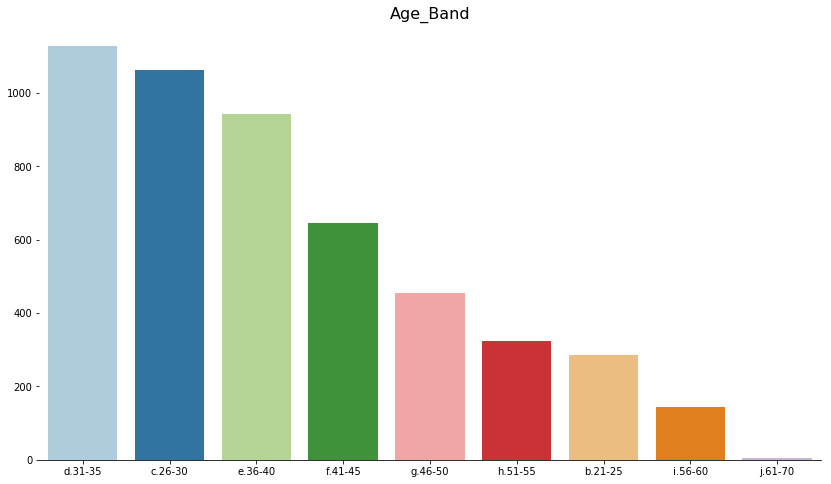

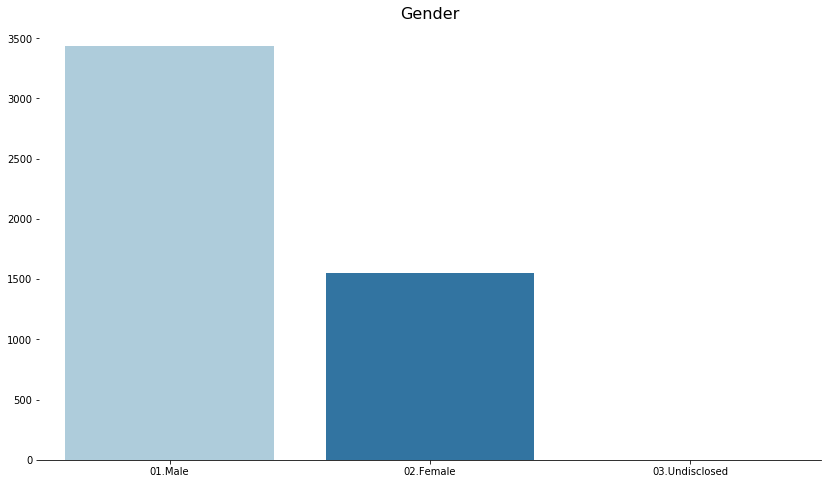

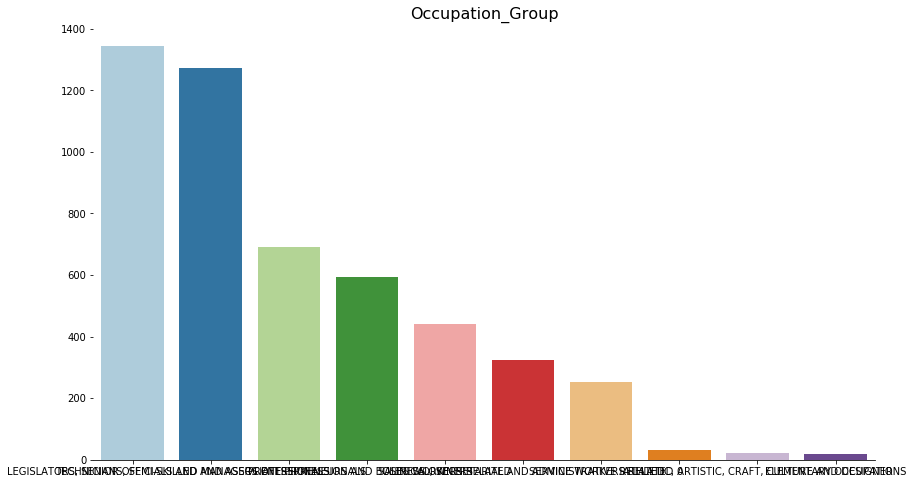

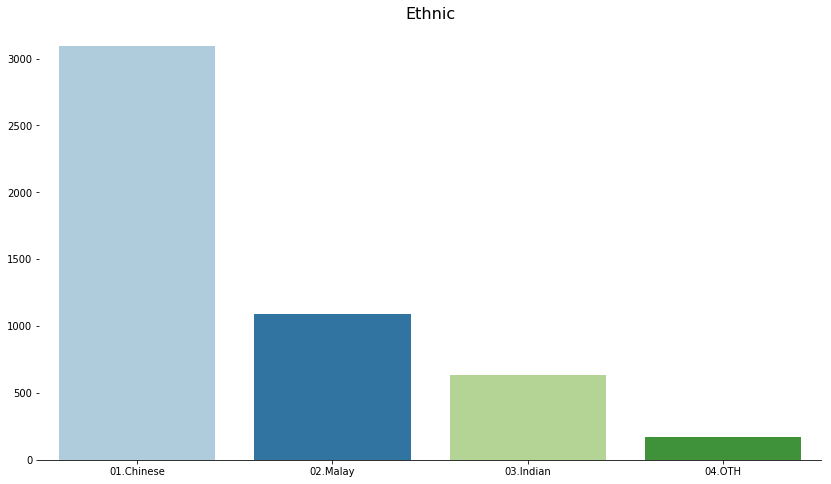

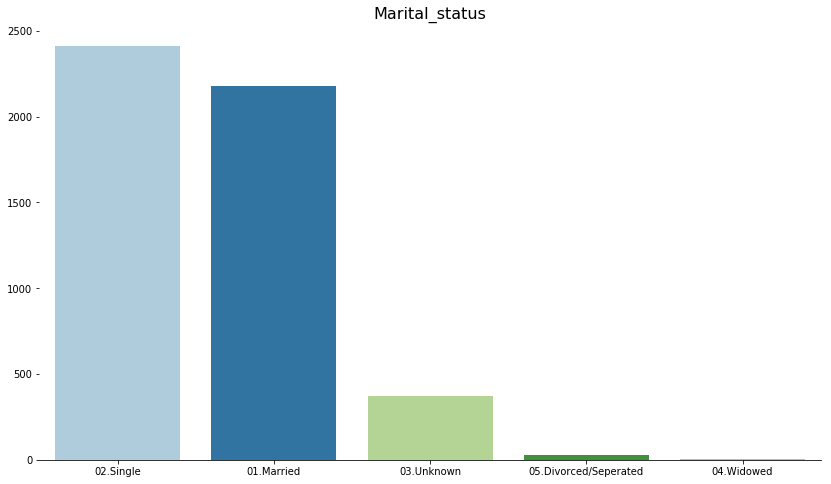

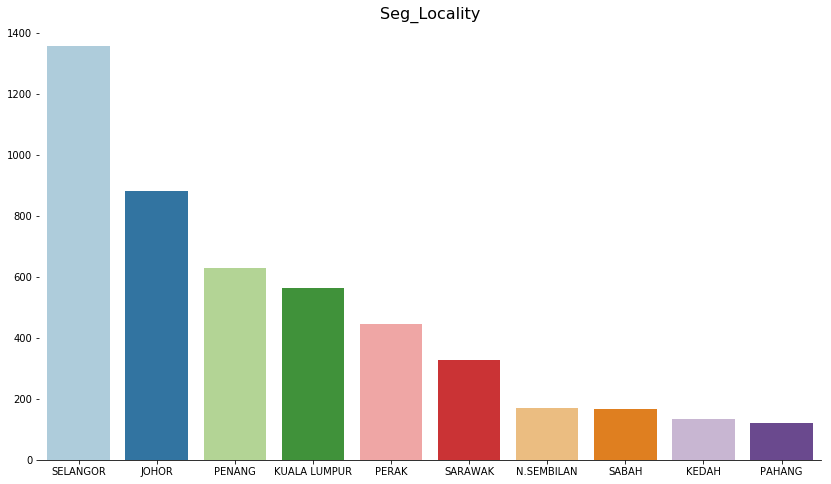

In [9]:
df_obj=df.select_dtypes(include=['object'])
variable=list(df_obj.columns)
for i in variable :
    def plot_categorical_count(df_obj, column, title='', limit=2, xtick_rotation='horizontal'):
        column_count = df_obj[column].value_counts()[:limit]
        fig = plt.figure(figsize=(14, 8))
        sns.barplot(x=column_count.index, y=column_count.values, palette='Paired')
        sns.despine(left=True)
        plt.title(title, fontsize=16)
        plt.xticks(rotation=xtick_rotation)
    plot_categorical_count(df_obj, column=i, title=i, limit=10)

# category counts based on target variable

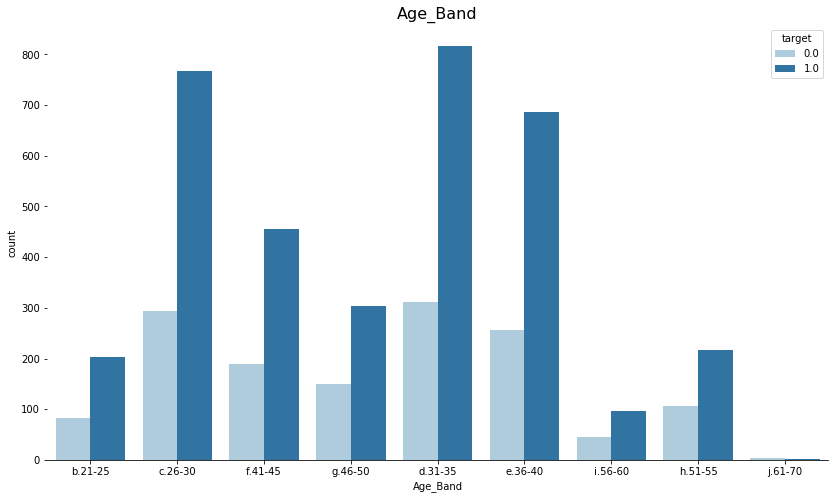

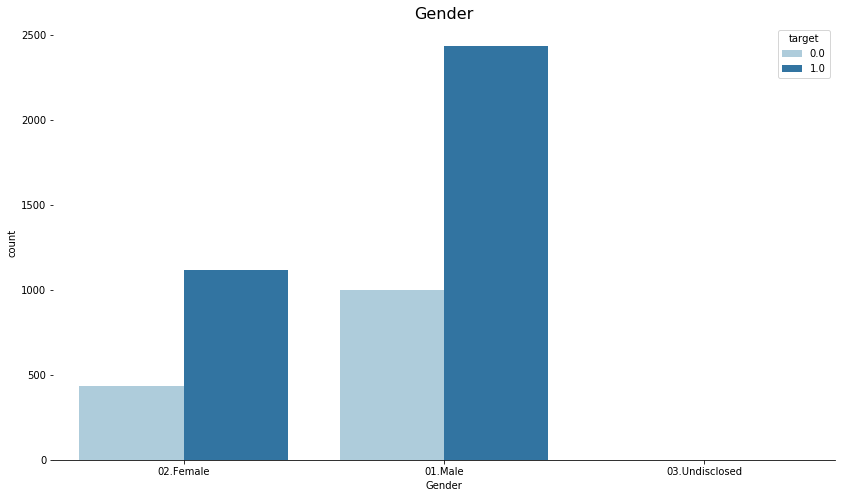

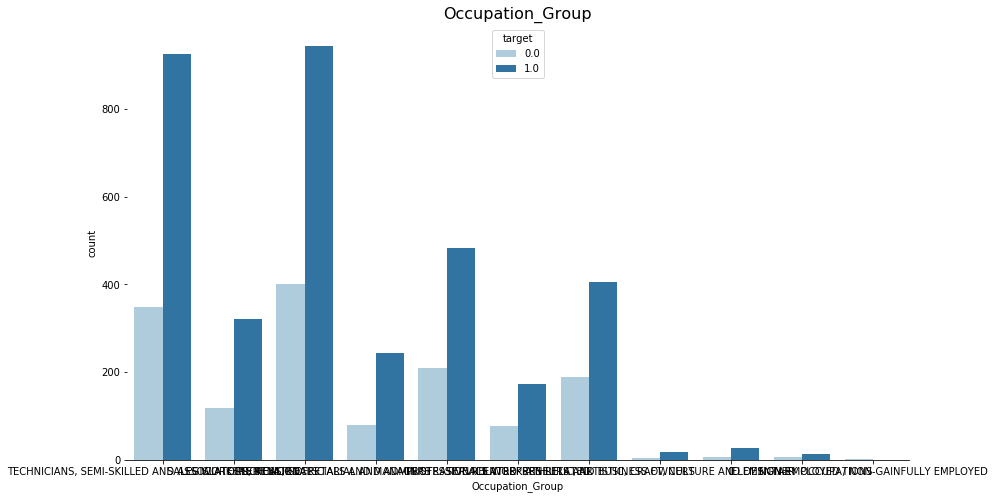

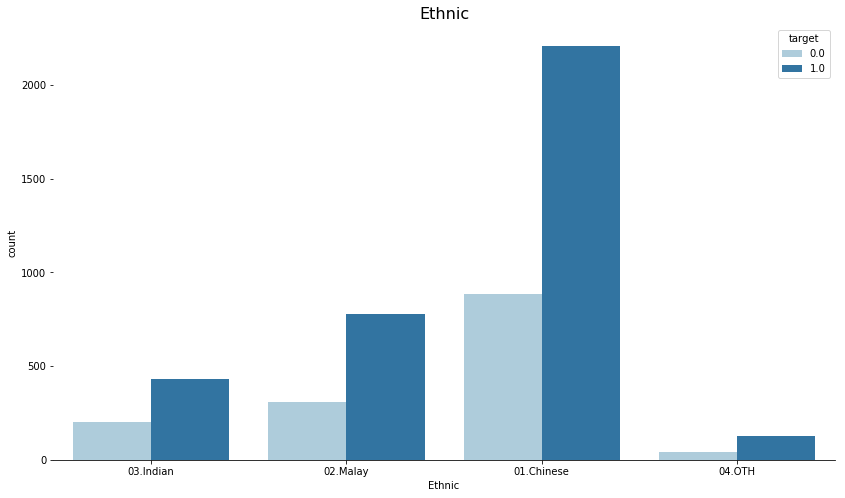

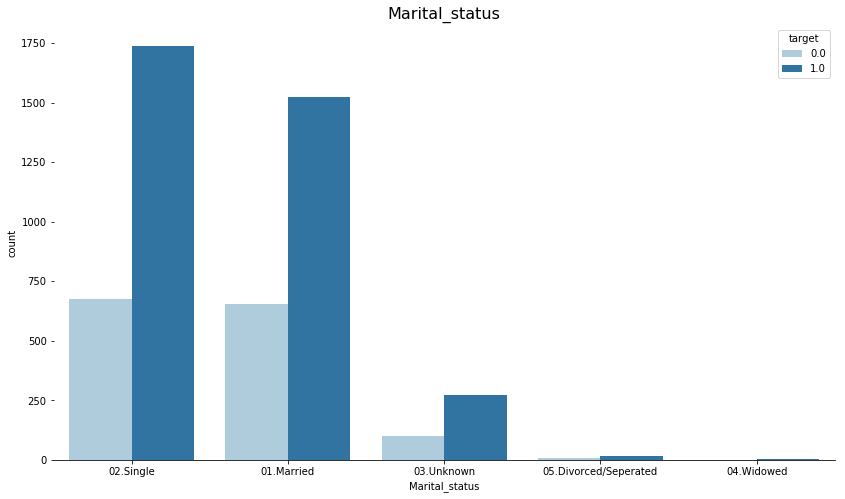

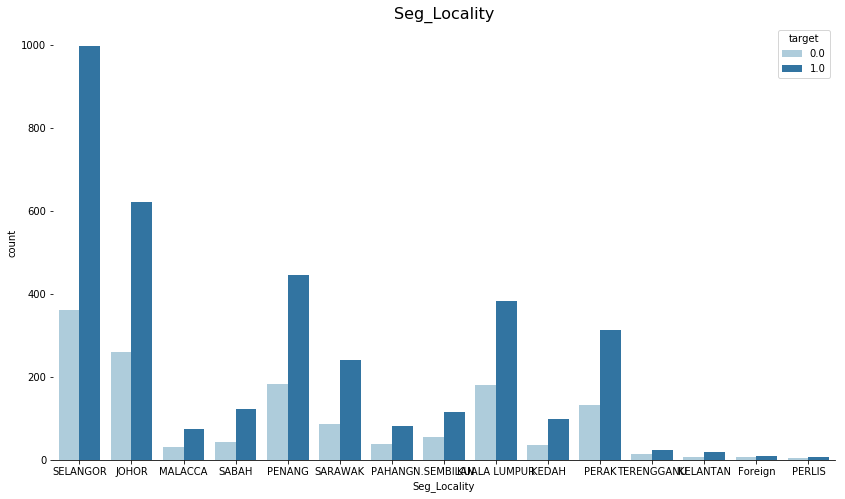

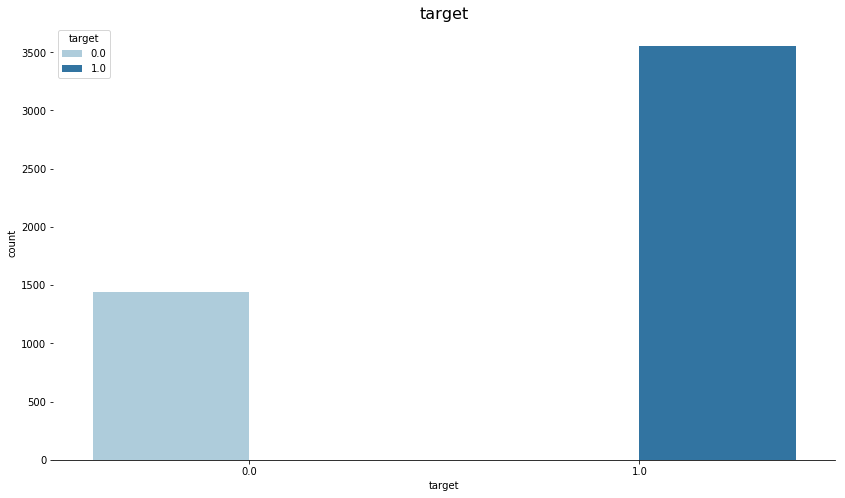

In [10]:
dfs=df[[ 'Age_Band', 'Gender', 'Occupation_Group', 'Ethnic', 'Marital_status', 'Seg_Locality', 'target']]#convert target variable into pbj type
var=list(dfs.columns)
for i in var:
    def contribution(i):
        plt.figure(figsize=(14, 8)) 
        sns.countplot(dfs[i], palette='Paired', hue=dfs['target'])
        sns.despine(left=True)
        plt.title(i, fontsize=16)
    contribution(i)
#sns.countplot(data=df, x = 'Age_Band', hue='target', palette='Paired', order=df['Age_Band'].value_counts()[:10].index)

# MISSING VALUE COUNTS OF EACH COLUMN

Your dataframe has 22 columns.
There are 19 columns that have missing values.


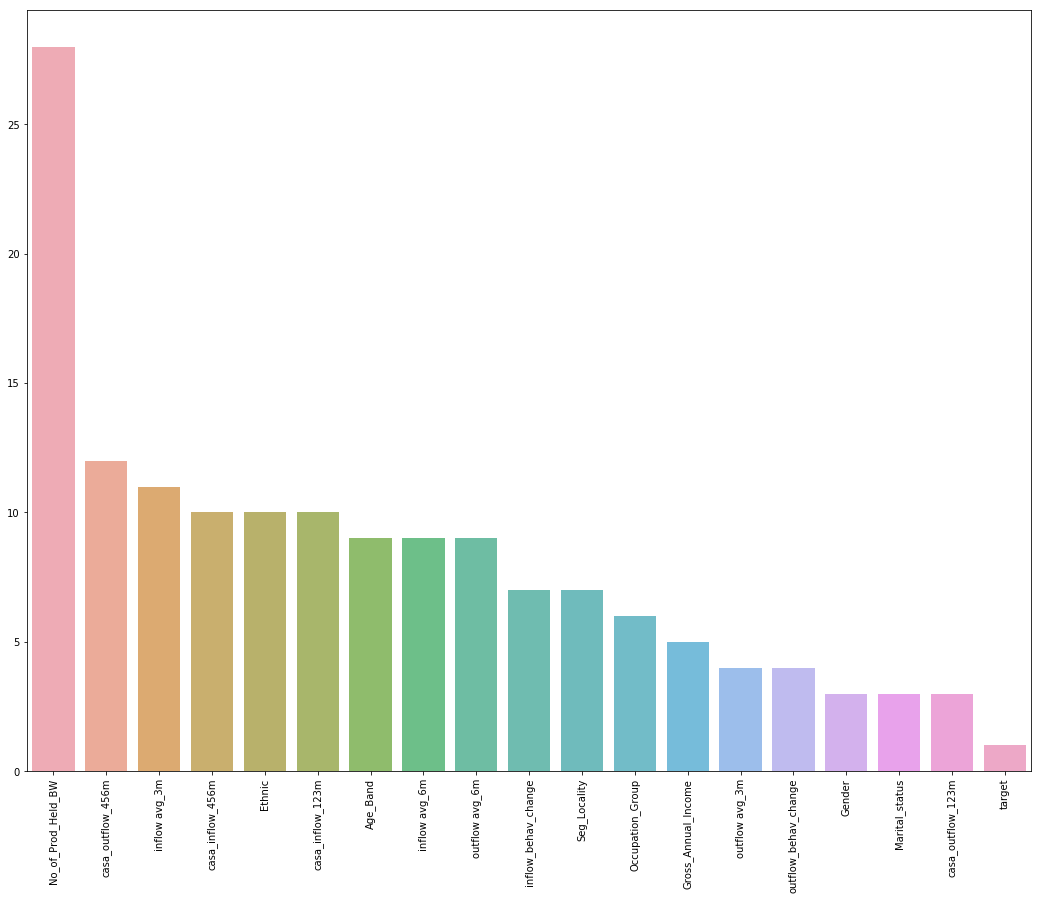

In [12]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(2)
    print ("Your dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) +" columns that have missing values.")
    plt.figure(figsize=(18,14))
    sns.barplot(mis_val_table_ren_columns.index, mis_val_table_ren_columns['Missing Values'].values, alpha=0.8)
    plt.xticks(rotation='vertical')
    return  plt.show()
missing_values_table(df)

# MEAN OF EACH COLUMN BASED ON TARGET VARIABLE

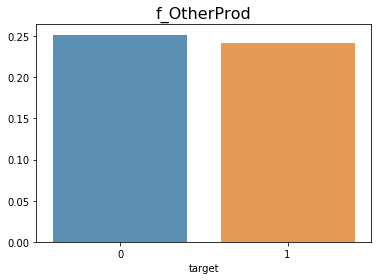

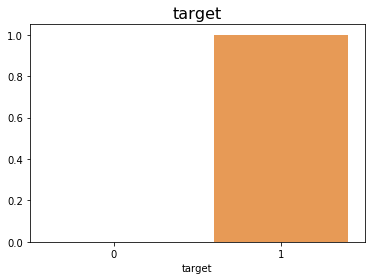

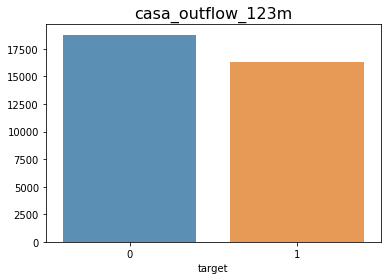

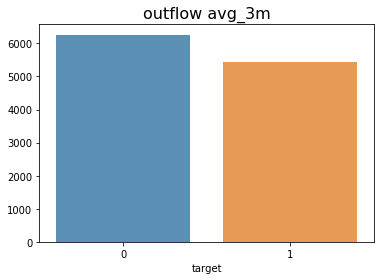

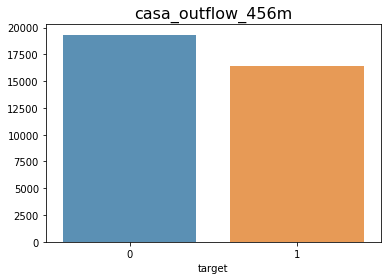

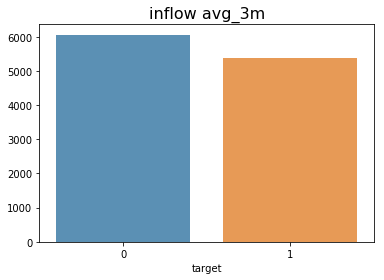

In [13]:
df_nums=df_nums[['f_OtherProd', 'target', 'casa_outflow_123m', 'outflow avg_3m','casa_outflow_456m',  'inflow avg_3m']]
import numpy as np
df_nums=df_nums.replace(np.nan,0)
df_nums=df_nums.replace(np.inf,0)
df_nums=df_nums.replace(-np.inf,0)
df_nums=df_nums.astype(int)
varss=list(df_nums.columns)
for i in varss:
    def avg(i):
        s=df_nums.groupby('target', as_index=True)[i].mean()
        sns.barplot(s.index, s.values, alpha=0.8)
        plt.title(i, fontsize=16)
        return plt.show()
    avg(i)

# OUTLIERS IN EACH COLUN CATEGORY


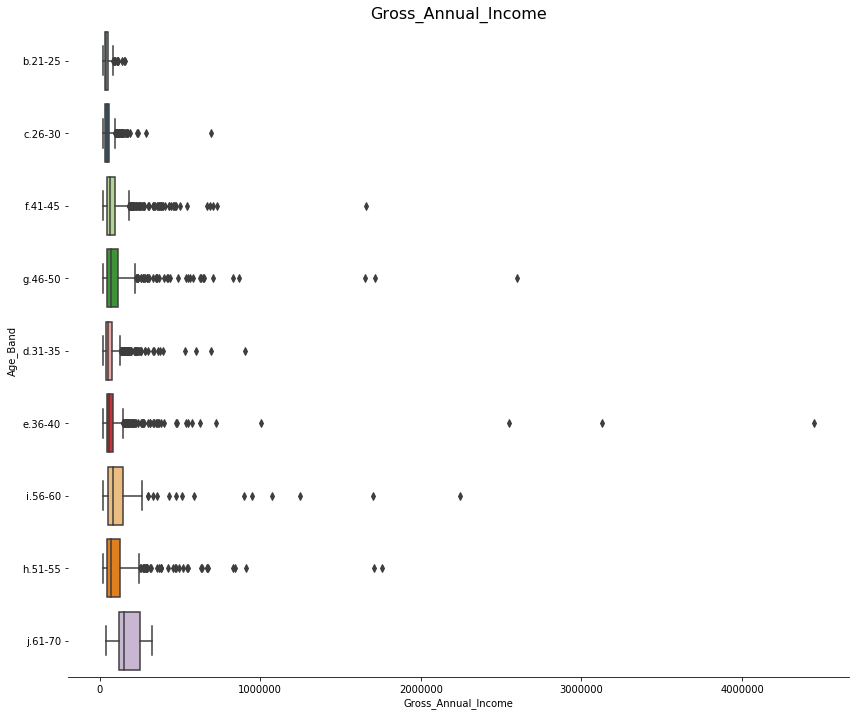

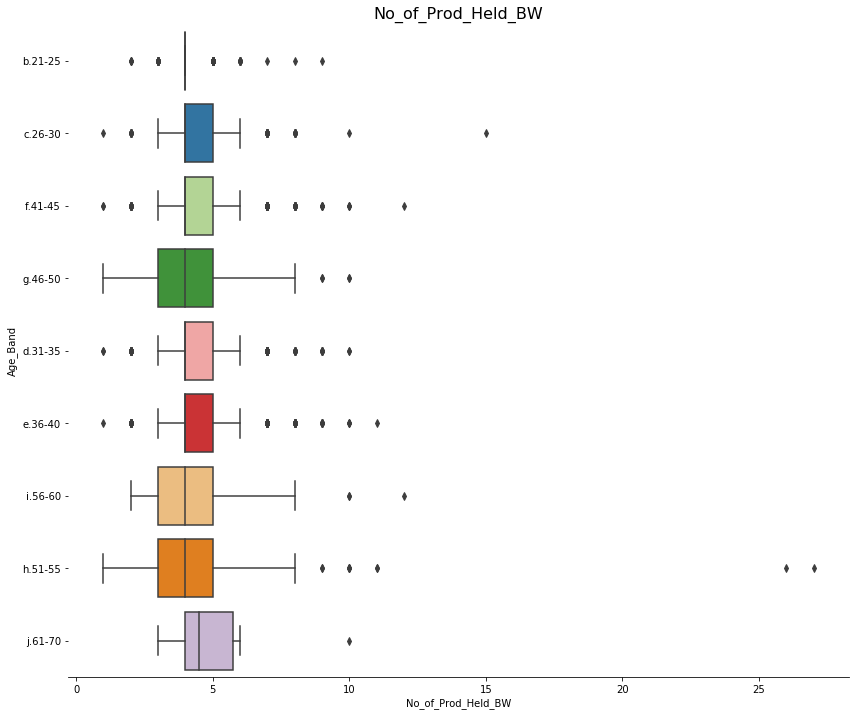

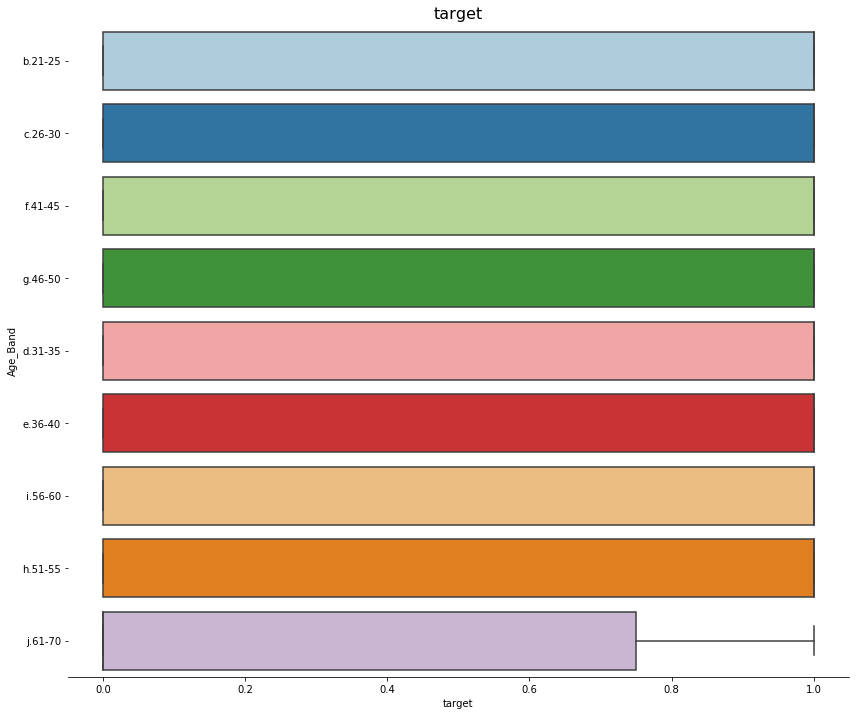

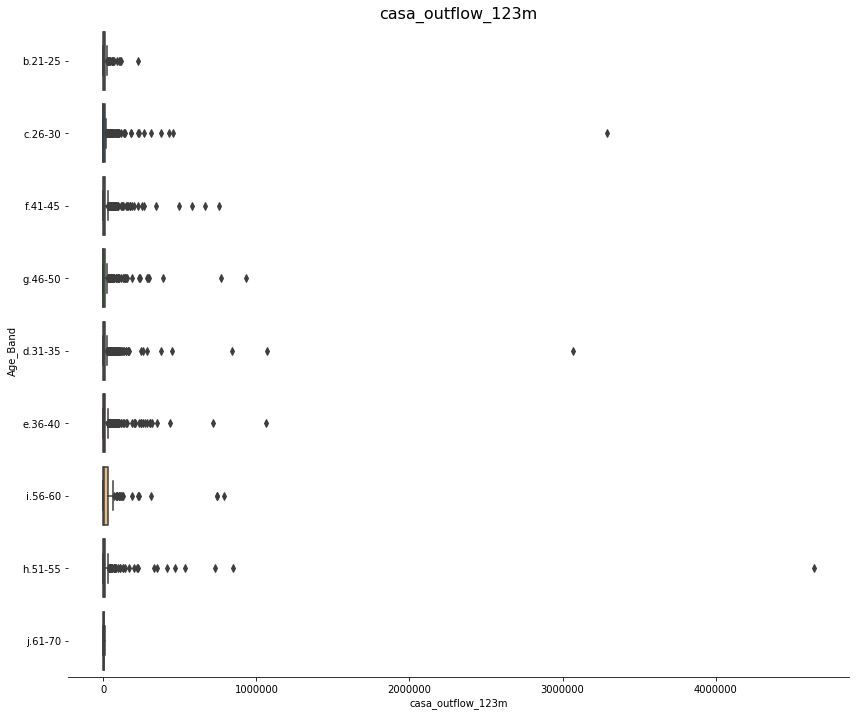

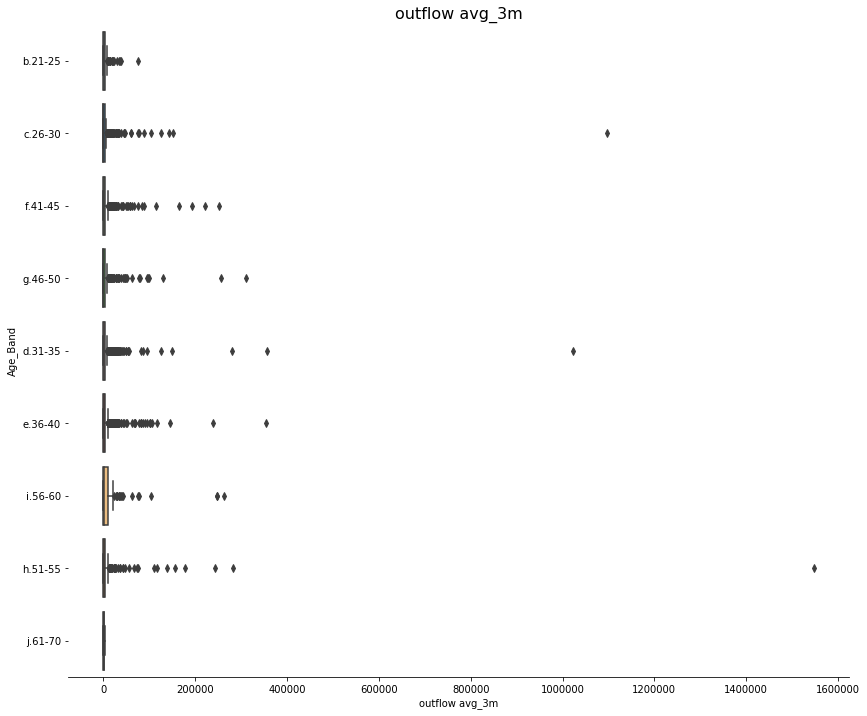

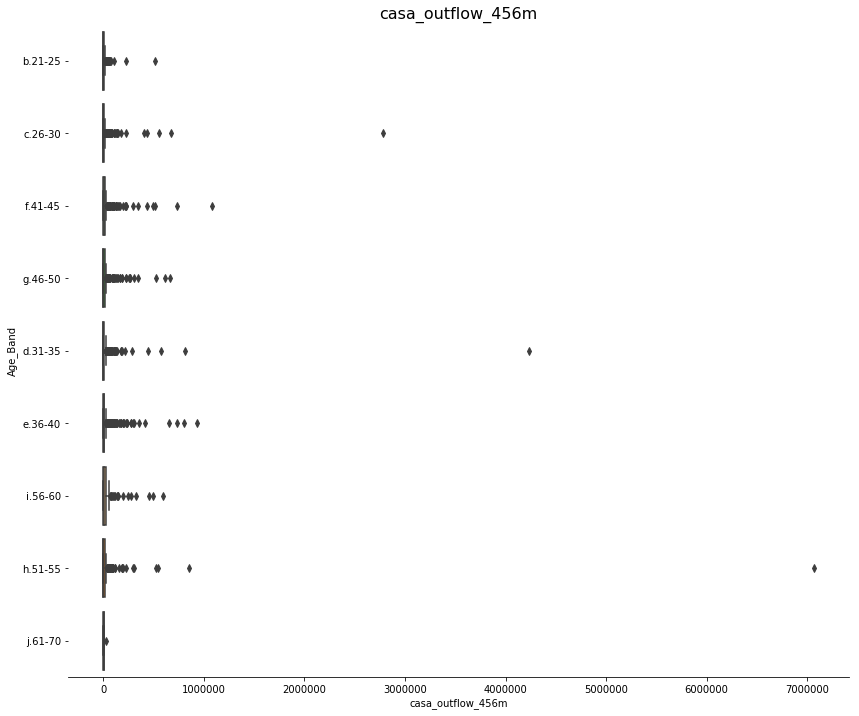

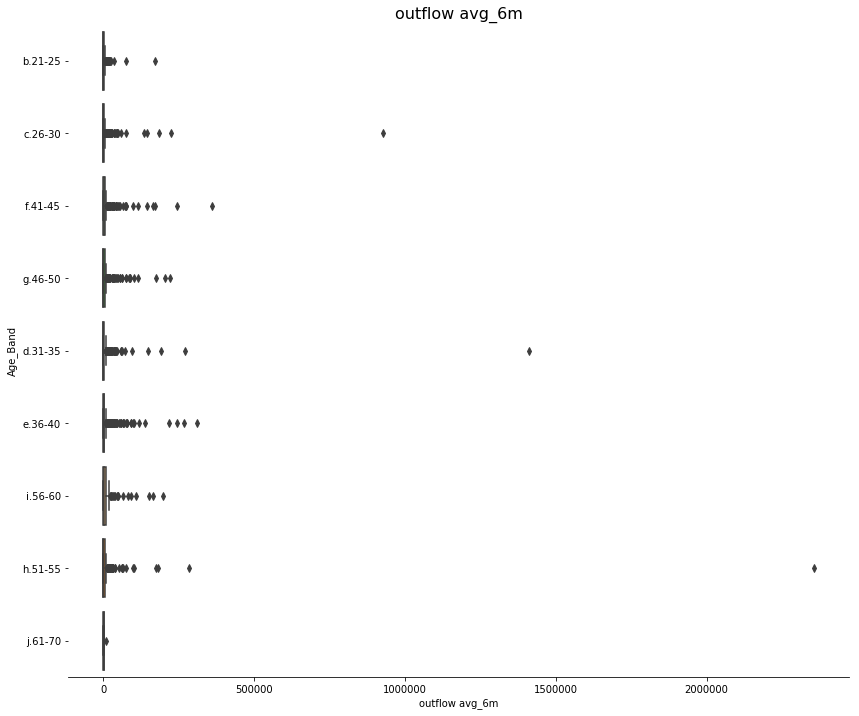

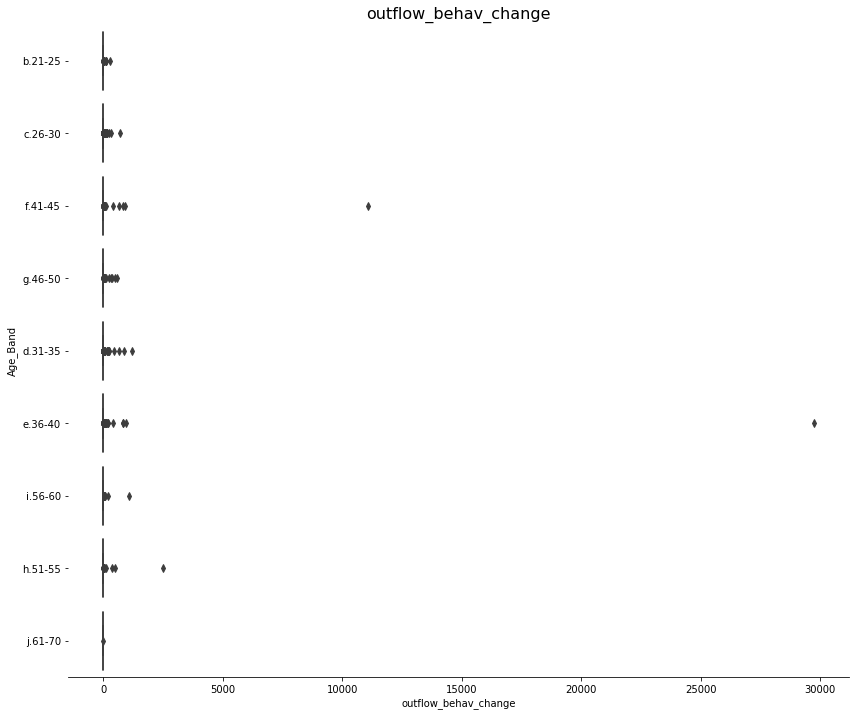

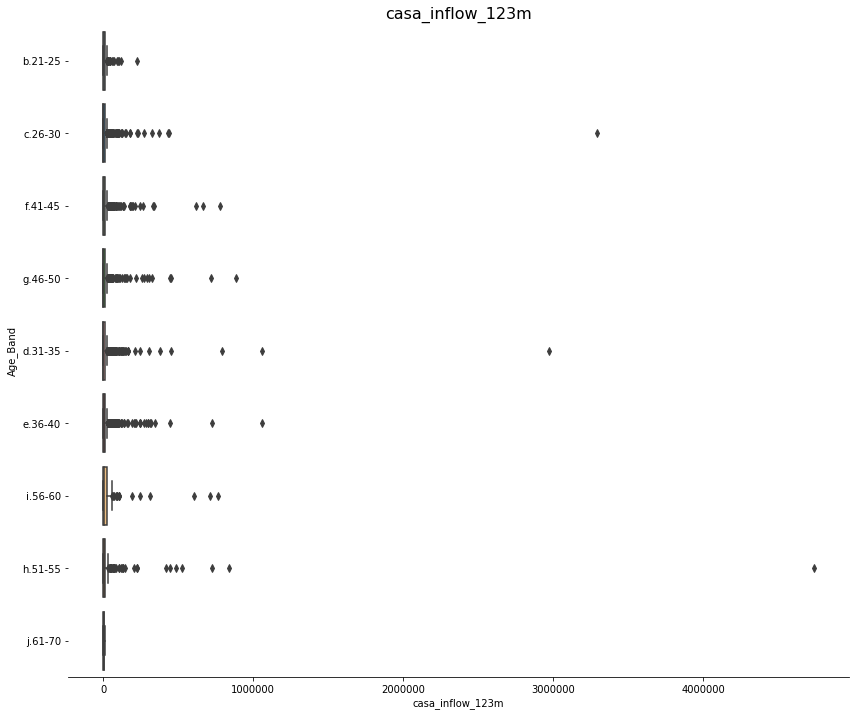

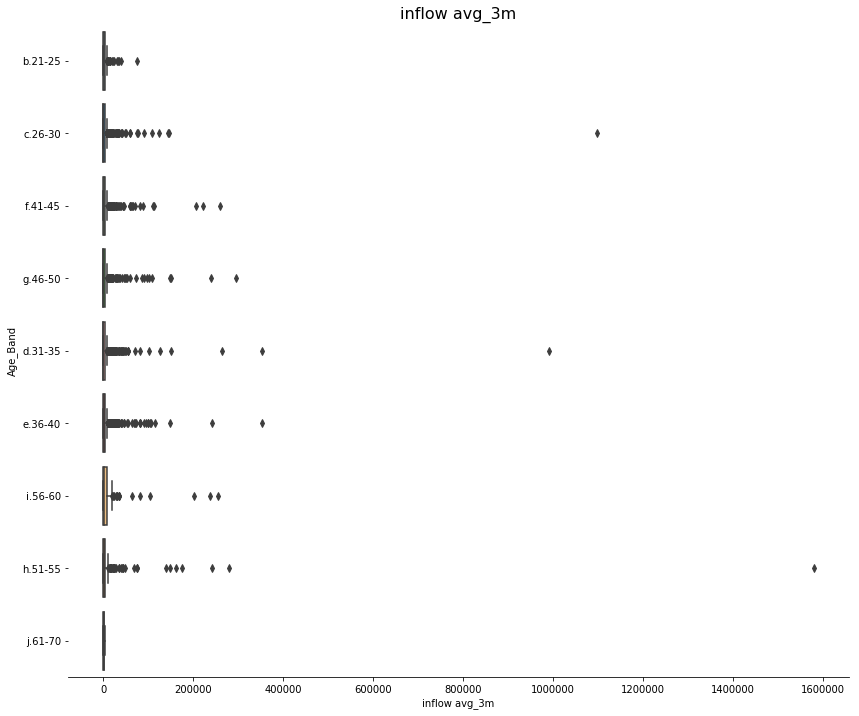

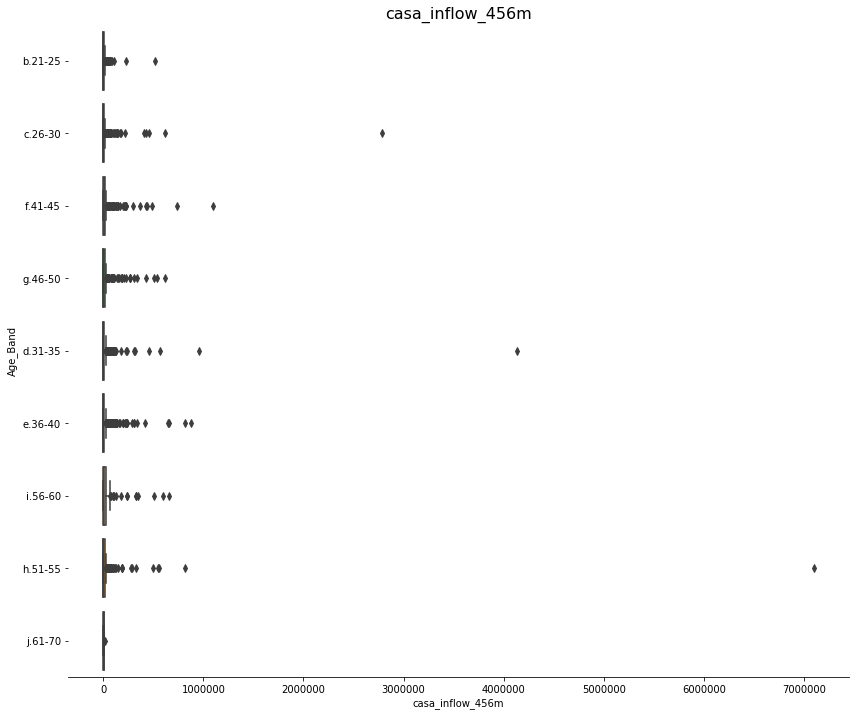

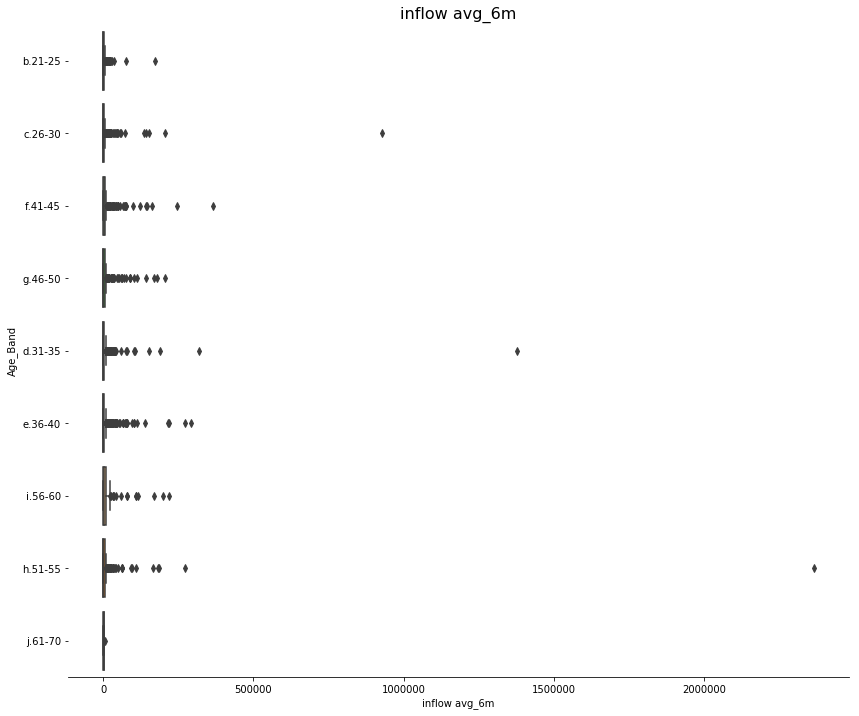

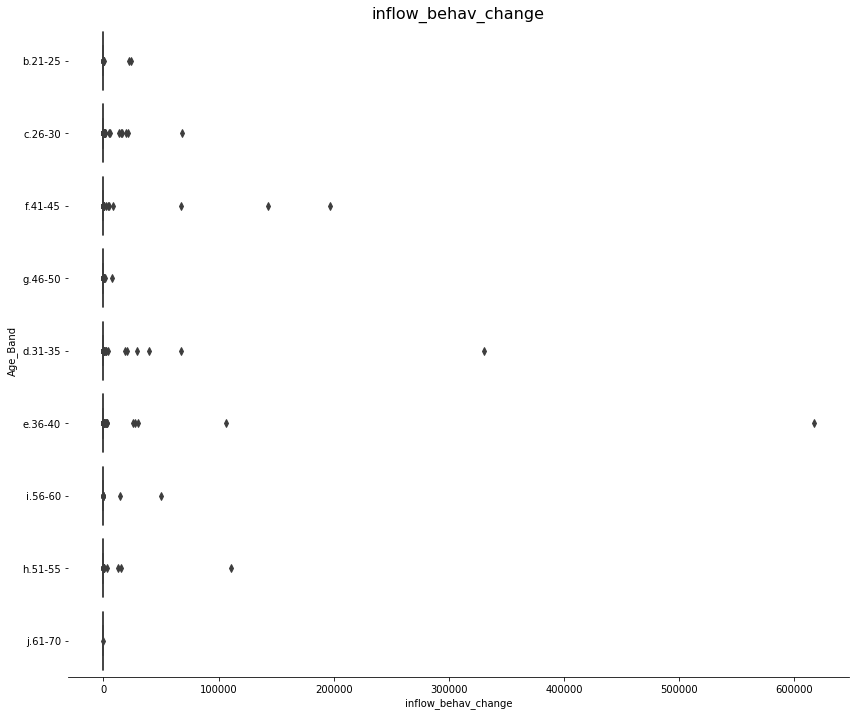

In [14]:
st=list(df_float.columns)
for i in st:
    def outliers(i)   :
        plt.figure(figsize=(14, 12))
        #df_top10 = df.where(df['target'].isin(df.target.values))#

        sns.boxplot(data=df_float, x=i, y=df['Age_Band'], palette='Paired')
        plt.title(i, fontsize=16)
        sns.despine(left=True)
    outliers(i)

# CORRELATION MATRIX

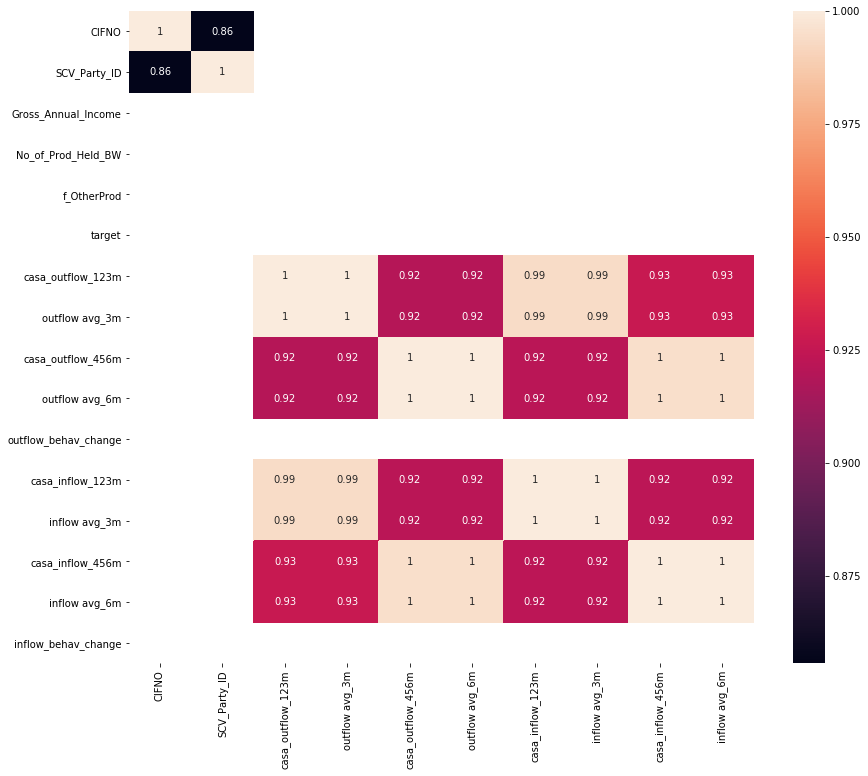

In [39]:
s=df.corr()
s=s[(s>0.8) ]
s=s.dropna(thresh=2,axis=1)
fig = plt.figure(figsize=(14, 12))
sns.heatmap(s,annot=True)

In [ ]:
# univarite analysis
df[df.state.isin(['WA', 'OR', 'CA'])].head()
reviews['province'].value_counts().head(10).plot.bar()
(reviews['province'].value_counts().head(10) / len(reviews)).plot.bar()
reviews['points'].value_counts().sort_index().plot.bar()#use for continuous numbers
reviews['points'].value_counts().sort_index().plot.line()
reviews['points'].value_counts().sort_index().plot.area()
reviews[reviews['price'] < 200]['price'].plot.hist()
reviews['price'].plot.hist()



#using seaborn
sns.countplot(reviews['points'])
sns.kdeplot(reviews.query('price < 200').price)
reviews[reviews['price'] < 200]['price'].value_counts().sort_index().plot.line()




#using seaborn
sns.countplot(reviews['points'])
sns.kdeplot(reviews.query('price < 200').price)
reviews[reviews['price'] < 200]['price'].value_counts().sort_index().plot.line()#bivariate analysis
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points')
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)
wine_counts.plot.bar(stacked=True)
wine_counts.plot.area()#wine counts contains full of numeric data
wine_counts.plot.line()



import seaborn as sns
sns.kdeplot(df[df['Gross_Annual_Income'] < 1000000].loc[:, [ 'outflow avg_3m', 'outflow avg_6m']].dropna())
sns.distplot(reviews['points'], bins=10, kde=False)
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100])
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100], kind='hex',  gridsize=20)

df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]

sns.boxplot(    x='variety',    y='points',    data=df)

sns.violinplot(    x='variety',    y='points',    data=reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)])

reviews['points'].value_counts().sort_index().plot.bar(figsize=(12, 6))
reviews['points'].value_counts().sort_index().plot.bar(figsize=(12, 6),    color='mediumvioletred')
reviews['points'].value_counts().sort_index().plot.bar(    figsize=(12, 6),    color='mediumvioletred',    fontsize=16)


# ANOVA TEST